<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/random_forest_%E5%AE%AB%E9%A2%88%E7%99%8C%E9%A2%84%E6%B5%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize
from sklearn import metrics

In [4]:
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False


In [5]:
names = [u'Age', u'Number of sexual partners', u'First sexual intercourse',
         u'Num of pregnancies', u'Smokes', u'Smokes (years)',
         u'Smokes (packs/year)', u'Hormonal Contraceptives',
         u'Hormonal Contraceptives (years)', u'IUD', u'IUD (years)', u'STDs',
         u'STDs (number)', u'STDs:condylomatosis',
         u'STDs:cervical condylomatosis', u'STDs:vaginal condylomatosis',
         u'STDs:vulvo-perineal condylomatosis', u'STDs:syphilis',
         u'STDs:pelvic inflammatory disease', u'STDs:genital herpes',
         u'STDs:molluscum contagiosum', u'STDs:AIDS', u'STDs:HIV',
         u'STDs:Hepatitis B', u'STDs:HPV', u'STDs: Number of diagnosis',
         u'STDs: Time since first diagnosis', u'STDs: Time since last diagnosis',
         u'Dx:Cancer', u'Dx:CIN', u'Dx:HPV', u'Dx', u'Hinselmann', u'Schiller',
         u'Citology', u'Biopsy']  # df.columns
path = "risk_factors_cervical_cancer.csv"  # 数据文件路径
data = pd.read_csv(path)
data.head(2)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [6]:
X = data[names[0:-4]]
Y = data[names[-4:]]
X.head(1)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0


In [9]:
# 空值的处理
X = X.replace("?", np.NAN)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X, Y)
X[0]

array([18.        ,  4.        , 15.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  6.14084507,  5.81690141,  0.        ,  0.        ,
        0.        ,  0.        ])

In [10]:
# 数据分割
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("训练样本数量:%d,特征属性数目:%d,目标属性数目:%d" % (x_train.shape[0], x_train.shape[1], y_train.shape[1]))
print("测试样本数量:%d" % x_test.shape[0])

训练样本数量:686,特征属性数目:32,目标属性数目:4
测试样本数量:172


In [11]:
# 标准化
ss = MinMaxScaler()
x_train = ss.fit_transform(x_train, y_train)
x_test = ss.transform(x_test)

In [13]:
# 降维
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [14]:
# 随机森林模型
forest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=1, random_state=0)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [15]:
# 模型效果评估
score = forest.score(x_test, y_test)
print("准确率:%.2f%%" % (score * 100))

准确率:89.53%


In [16]:
# 模型预测
forest_y_score = forest.predict_proba(x_test)
# 计算ROC值
forest_fpr1, forest_tpr1, _ = metrics.roc_curve(label_binarize(y_test[names[-4]], classes=(0, 1, 2)).T[0:-1].T.ravel(),
                                                forest_y_score[0].ravel())
forest_fpr2, forest_tpr2, _ = metrics.roc_curve(label_binarize(y_test[names[-3]], classes=(0, 1, 2)).T[0:-1].T.ravel(),
                                                forest_y_score[1].ravel())
forest_fpr3, forest_tpr3, _ = metrics.roc_curve(label_binarize(y_test[names[-2]], classes=(0, 1, 2)).T[0:-1].T.ravel(),
                                                forest_y_score[2].ravel())
forest_fpr4, forest_tpr4, _ = metrics.roc_curve(label_binarize(y_test[names[-1]], classes=(0, 1, 2)).T[0:-1].T.ravel(),
                                                forest_y_score[3].ravel())
# AUC值
auc1 = metrics.auc(forest_fpr1, forest_tpr1)
auc2 = metrics.auc(forest_fpr2, forest_tpr2)
auc3 = metrics.auc(forest_fpr3, forest_tpr3)
auc4 = metrics.auc(forest_fpr4, forest_tpr4)
print("Hinselmann目标属性AUC值：", auc1)
print("Schiller目标属性AUC值：", auc2)
print("Citology目标属性AUC值：", auc3)
print("Biopsy目标属性AUC值：", auc4)

Hinselmann目标属性AUC值： 0.9901974040021634
Schiller目标属性AUC值： 0.9559221200648998
Citology目标属性AUC值： 0.9637979989183343
Biopsy目标属性AUC值： 0.9568685776095187


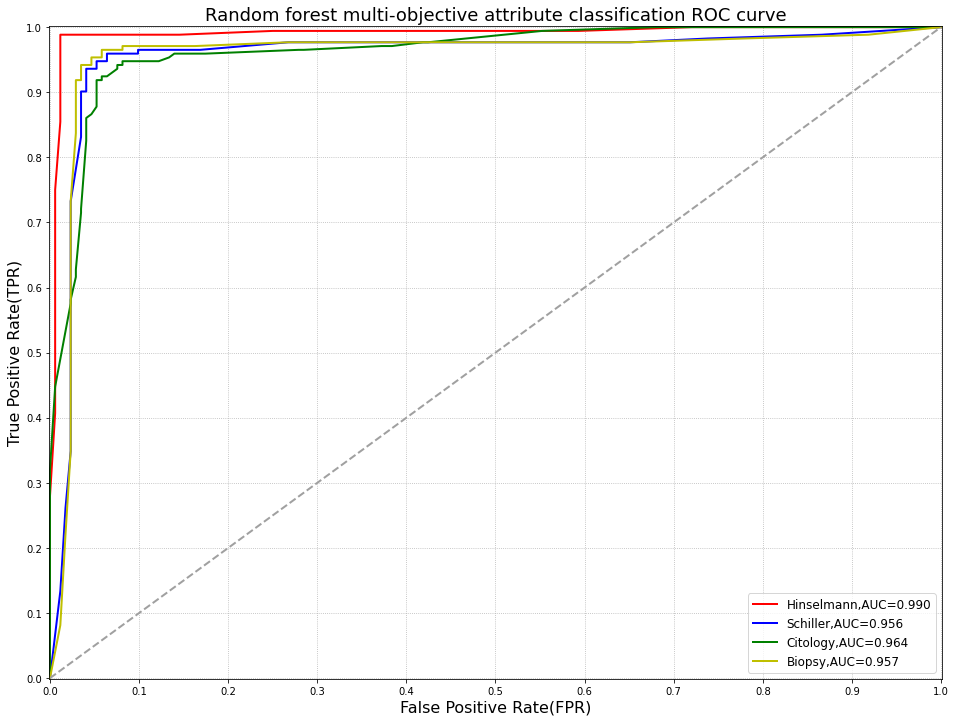

In [18]:
## 8. 画图（ROC图）
plt.figure(figsize=(16, 12), facecolor='w')
plt.plot(forest_fpr1, forest_tpr1, c='r', lw=2, label=u'Hinselmann,AUC=%.3f' % auc1)
plt.plot(forest_fpr2, forest_tpr2, c='b', lw=2, label=u'Schiller,AUC=%.3f' % auc2)
plt.plot(forest_fpr3, forest_tpr3, c='g', lw=2, label=u'Citology,AUC=%.3f' % auc3)
plt.plot(forest_fpr4, forest_tpr4, c='y', lw=2, label=u'Biopsy,AUC=%.3f' % auc4)
plt.plot((0, 1), (0, 1), c='#a0a0a0', lw=2, ls='--')
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate(FPR)', fontsize=16)
plt.ylabel('True Positive Rate(TPR)', fontsize=16)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'Random forest multi-objective attribute classification ROC curve', fontsize=18)
plt.show()

In [19]:
# 比较不同树数目、树最大深度的情况下随机森林的正确率
# 一般情况下，初始的随机森林树个数是100，深度1，如果需要我们再进行优化操作
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.5, random_state=0)
print("训练样本数量%d，测试样本数量:%d" % (x_train2.shape[0], x_test2.shape[0]))
## 比较
estimators = [1, 50, 100, 500]
depth = [1, 2, 3, 7, 15]
x1, x2 = np.meshgrid(estimators, depth)
err_list = []
for es in estimators:
    es_list = []
    for d in depth:
        tf = RandomForestClassifier(n_estimators=es, criterion='gini', max_depth=d, max_features=None, random_state=0)
        tf.fit(x_train2, y_train2)
        st = tf.score(x_test2, y_test2)
        err = 1 - st
        es_list.append(err)
        print("%d决策树数目，%d最大深度，正确率:%.2f%%" % (es, d, st * 100))
    err_list.append(es_list)


训练样本数量429，测试样本数量:429
1决策树数目，1最大深度，正确率:86.48%
1决策树数目，2最大深度，正确率:86.95%
1决策树数目，3最大深度，正确率:84.62%
1决策树数目，7最大深度，正确率:82.75%
1决策树数目，15最大深度，正确率:78.09%
50决策树数目，1最大深度，正确率:86.71%
50决策树数目，2最大深度，正确率:86.48%
50决策树数目，3最大深度，正确率:86.48%
50决策树数目，7最大深度，正确率:86.25%
50决策树数目，15最大深度，正确率:84.38%
100决策树数目，1最大深度，正确率:86.95%
100决策树数目，2最大深度，正确率:86.25%
100决策树数目，3最大深度，正确率:86.48%
100决策树数目，7最大深度，正确率:86.25%
100决策树数目，15最大深度，正确率:85.08%
500决策树数目，1最大深度，正确率:86.48%
500决策树数目，2最大深度，正确率:86.48%
500决策树数目，3最大深度，正确率:86.48%
500决策树数目，7最大深度，正确率:86.25%
500决策树数目，15最大深度，正确率:84.85%


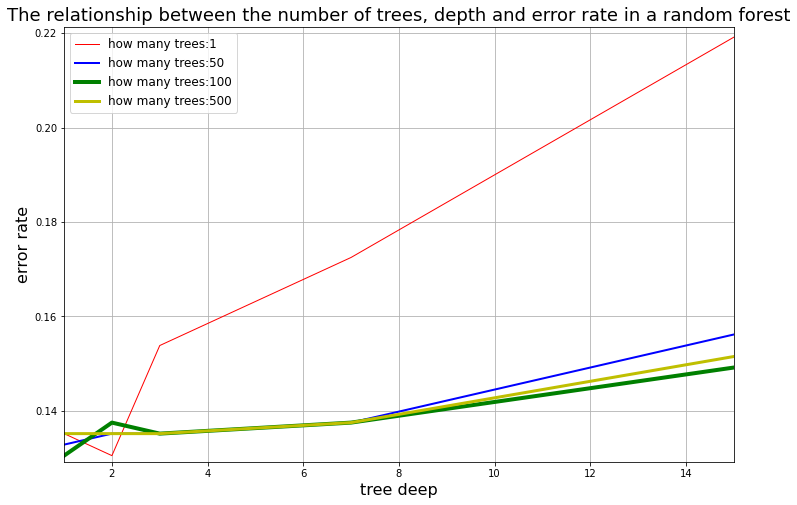

In [20]:
## 画图
plt.figure(facecolor='w',figsize=(12,8))
i = 0
colors = ['r', 'b', 'g', 'y']
lw = [1, 2, 4, 3]
max_err = 0
min_err = 100
for es, l in zip(estimators, err_list):
    plt.plot(depth, l, c=colors[i], lw=lw[i], label=u'how many trees:%d' % es)
    max_err = max((max(l), max_err))
    min_err = min((min(l), min_err))
    i += 1
plt.xlabel(u'tree deep', fontsize=16)
plt.ylabel(u'error rate', fontsize=16)
plt.legend(loc='upper left', fancybox=True, framealpha=0.8, fontsize=12)
plt.grid(True)
plt.xlim(min(depth), max(depth))
plt.ylim(min_err * 0.99, max_err * 1.01)
plt.title(u'The relationship between the number of trees, depth and error rate in a random forest', fontsize=18)
plt.show()

# 1、了解缺省值处理方法 2、了解随机深林API的使用 3、回顾ROC曲线的计算 4、了解一般情况下，随机森林的树的个数是100，深度是1